<a href="https://colab.research.google.com/github/Ameesha2214/Afame_Technologies/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the transaction data
train_data = pd.read_csv('/content/fraudTest.csv')
test_data = pd.read_csv('/content/fraudTrain.csv')


In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:

print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:

print(train_data.describe())


          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1

In [6]:
print(train_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [7]:
print(train_data['is_fraud'].value_counts())

is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [9]:
train_data.drop(['trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num','Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num','Unnamed: 0'], axis=1, inplace=True)


In [10]:

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      555719 non-null  int64  
 1   merchant    555719 non-null  object 
 2   category    555719 non-null  object 
 3   amt         555719 non-null  float64
 4   gender      555719 non-null  object 
 5   zip         555719 non-null  int64  
 6   lat         555719 non-null  float64
 7   long        555719 non-null  float64
 8   city_pop    555719 non-null  int64  
 9   unix_time   555719 non-null  int64  
 10  merch_lat   555719 non-null  float64
 11  merch_long  555719 non-null  float64
 12  is_fraud    555719 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 55.1+ MB


In [11]:

train_data.head()

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


In [12]:
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [13]:
categorical_features = ['merchant', 'category', 'gender']
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['is_fraud']]

In [14]:
numerical_transformer = StandardScaler()

In [15]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [17]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [18]:
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])

    print(f"Training {name}...")
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"\n{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

Training Logistic Regression...

Logistic Regression Metrics:
Accuracy: 0.9938
Precision: 0.0101
Recall: 0.0008
F1-score: 0.0015
ROC AUC: 0.5002
Training Decision Tree...

Decision Tree Metrics:
Accuracy: 0.9943
Precision: 0.5072
Recall: 0.5350
F1-score: 0.5207
ROC AUC: 0.7660
Training Random Forest...

Random Forest Metrics:
Accuracy: 0.9951
Precision: 0.9303
Recall: 0.1672
F1-score: 0.2835
ROC AUC: 0.5836


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import seaborn as sns


In [20]:
def plot_conf_matrix(y_test, y_pred, ax, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'], ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(title)

In [21]:
def plot_roc_curve(model, X_test, y_test, ax, title):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')

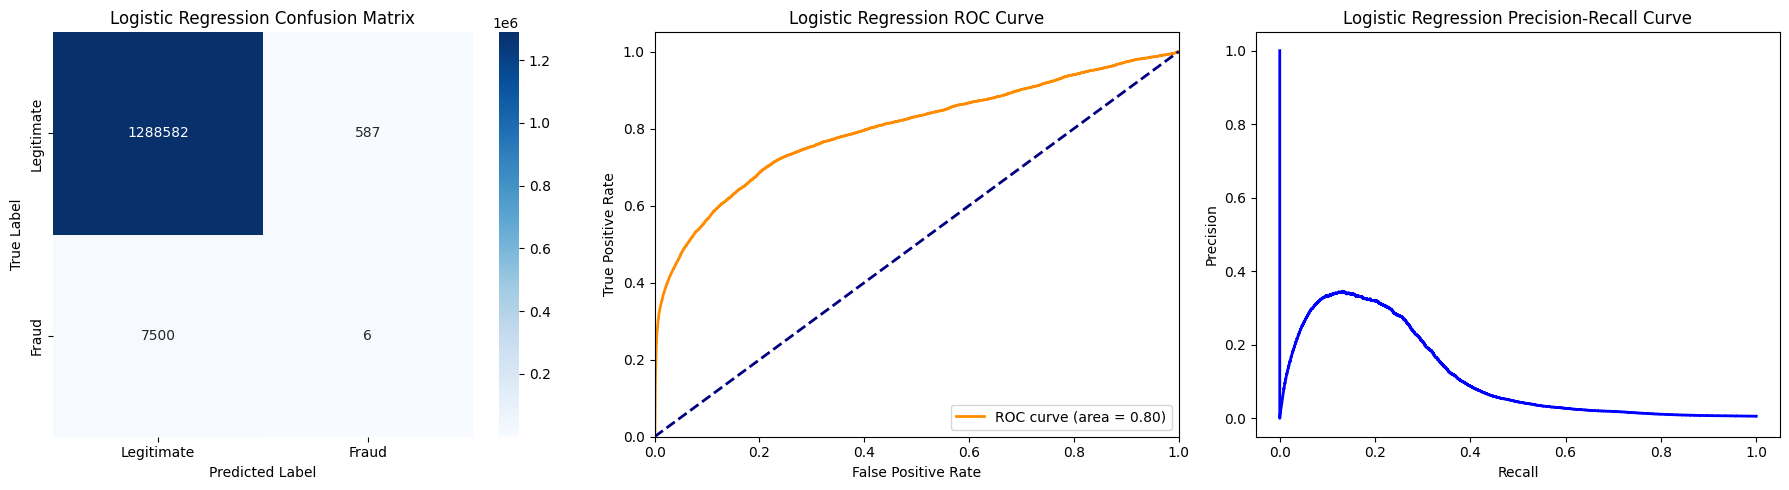

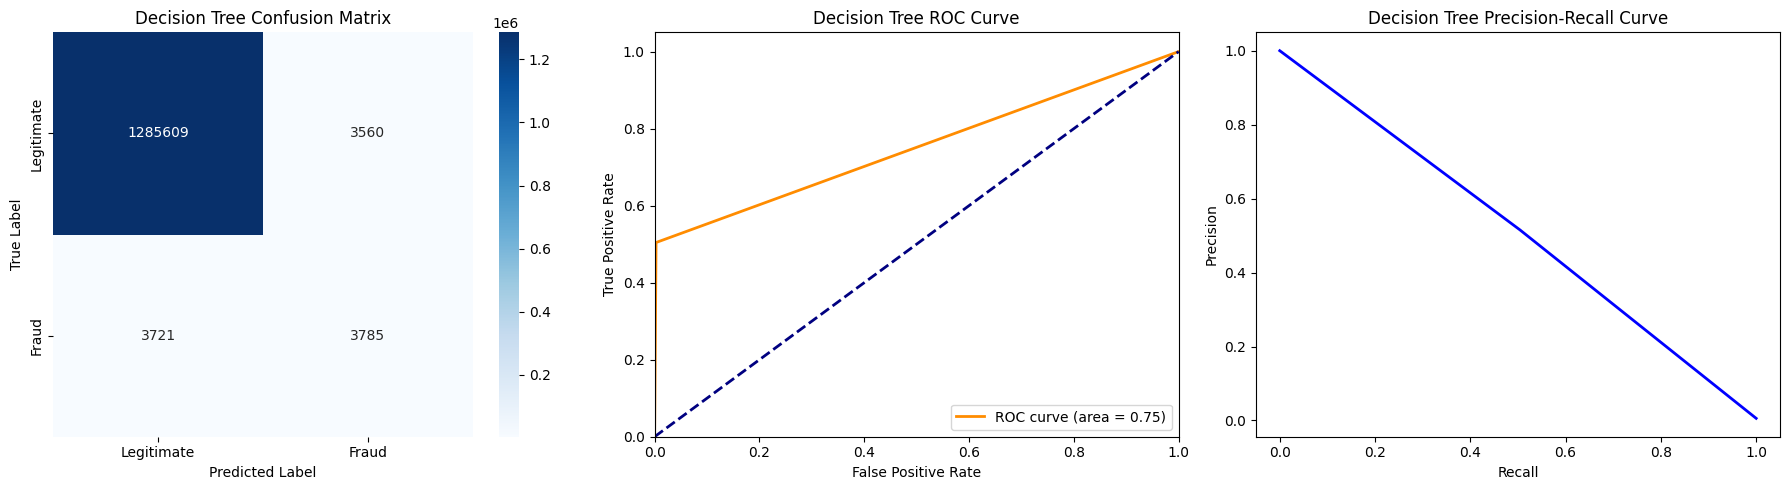

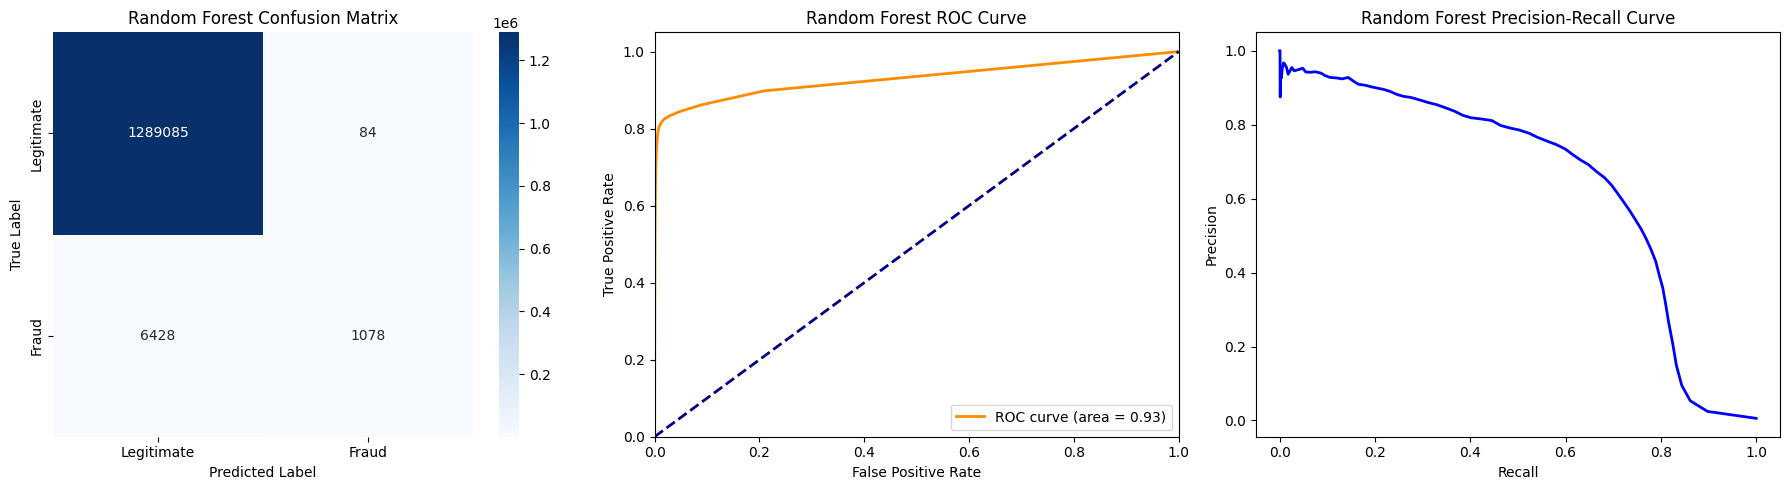

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import seaborn as sns

# Function to plot confusion matrix
def plot_conf_matrix(y_test, y_pred, ax, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'], ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(title)

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, ax, title):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')

# Function to plot Precision-Recall curve
def plot_pr_curve(model, X_test, y_test, ax, title):
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    ax.plot(recall, precision, color='b', lw=2)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(title)

# Fit and evaluate models
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Plot confusion matrix
    plot_conf_matrix(y_test, y_pred, axes[0], f'{name} Confusion Matrix')

    # Plot ROC curve
    plot_roc_curve(clf, X_test, y_test, axes[1], f'{name} ROC Curve')

    # Plot Precision-Recall curve
    plot_pr_curve(clf, X_test, y_test, axes[2], f'{name} Precision-Recall Curve')

    plt.tight_layout()
    plt.show()

**Conclusion:**
Based on these metrics, the Decision Tree model appears to be the best choice for this project because it offers a good balance between precision and recall, as indicated by its F1-score and ROC AUC. While Random Forest has a very high precision, its recall is significantly lower, meaning it misses a larger number of actual fraud cases compared to the Decision Tree.